# NLP 2025
# Lab 2: Word Vectors and Information Retrieval

During the first few weeks, we discussed various ways to represent text 📝. One key question was: What should be the basic unit of representation? Words are the fundamental building blocks 🧱.

In this lab, we will explore different text representation models, such as Bag-of-Words (BoW), TF-IDF and word embeddings 🔤➡️🔢. Among these, word embeddings are the most effective in terms of performance. They represent each word as a vector of numbers, where each vector captures the meaning of the word 🧠📊.

These numerical representations (or weights) are learned using machine learning models 🤖. We’ll dive deeper into how these vectors are learned in the next lecture 📚.

For now, we’ll focus on how different representation methods affect performance in an information retrieval task 🔍.

By the end of this lab, you should be able to:

+ 🧼🔁 Implement and/or use built-in functions to preprocess your data (once again!)
+ 🧱👜 Build a Bag-of-Words representation of the dataset
+ 📊✨ Implement TF-IDF
+ 📥🔤 Load pre-trained word embeddings
+ 🔍🧠 Inspect and test word embedding properties
+ 🗣️➡️📐 Use word embeddings to get sentence representations (aka sentence embeddings)
+ 🧩🔎 Use sentence embeddings to solve more complex tasks like information retrieval
+ 🧪📏 Design evaluation frameworks for specific NLP tasks and assess their difficulty

### Score breakdown

| Exercise            | Points |
|---------------------|--------|
| [Exercise 1](#e1)   | 1      |
| [Exercise 2](#e2)   | 1      |
| [Exercise 3](#e3)   | 1      |
| [Exercise 4](#e4)   | 1      |
| [Exercise 5](#e5)   | 1      |
| [Exercise 6](#e6)   | 2      |
| [Exercise 7](#e7)   | 10     |
| [Exercise 8](#e8)   | 5      |
| [Exercise 9](#e9)   | 15     |
| [Exercise 10](#e10) | 10     |
| [Exercise 11](#e11) | 10     |
| [Exercise 12](#e12) | 5      |
| [Exercise 13](#e13) | 15     |
| [Exercise 14](#e14) | 3      |
| [Exercise 15](#e15) | 10     |
| [Exercise 16](#e16) | 10     |
| Total               | 100    |

This score will be scaled down to 1 and that will be your final lab score.

### 📌 **Instructions for Delivery** (📅 **Deadline: 18/Apr 18:00**, 🎭 *wildcards possible*)

✅ **Submission Requirements**
+ 📄 You need to submit a **PDF of your report** (use the templates provided in **LaTeX** 🖋️ (*preferred*) or **Word** 📑) and a **copy of your notebook** 📓 with the code.
+ ⚡ Make sure that **all cells are executed properly** ⚙️ and that **all figures/results/plots** 📊 you include in the report are also visible in your **executed notebook**.

✅ **Collaboration & Integrity**
+ 🗣️ While you may **discuss** the lab with others, you must **write your solutions with your group only**. If you **discuss specific tasks** with others, please **include their names** in the appendix of the report.
+ 📜 **Honor Code applies** to this lab. For more details, check **Syllabus §7.2** ⚖️.
+ 📢 **Mandatory Disclosure**:
   - Any **websites** 🌐 (e.g., **Stack Overflow** 💡) or **other resources** used must be **listed and disclosed**.
   - Any **GenAI tools** 🤖 (e.g., **ChatGPT**) used must be **explicitly mentioned**.
   - 🚨 **Failure to disclose these resources is a violation of academic integrity**. See **Syllabus §7.3** for details.

## 0. Setup

As in the last lab, we will be using huggingface datasets library ([https://huggingface.co/datasets](https://huggingface.co/datasets)). You can find the detailed documentation and tutorials here: [https://huggingface.co/docs/datasets/en/index](https://huggingface.co/docs/datasets/en/index)

If you don't have it installed you can run the code below or install it via `pip` in your terminal. If you are using Google Colab, you can uncomment and run the code below in a code cell. Restarting of the runtime may be required after installation (Runtime/Restart session).

In [13]:
! pip install -U datasets~=3.5.0
! pip install -U gensim
! python -m pip install -U matplotlib
! pip install nltk
! pip install -U scikit-learn

  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5


Previously installed datasets library version of 3.2.0 had an error when combined with numpy version >2. If you encounter an error at some point it might require to update the datasets library to the newer version. You can do that by running the code below. If you are using Google Colab, you can run the code below in a code cell. If you are using Jupyter Notebook, you can run the code below in a code cell or in a terminal.

In [11]:
! pip install --upgrade --force-reinstall datasets

  Using cached datasets-3.5.0-py3-none-any.whl.metadata (19 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached numpy-2.2.5-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached pyarrow-19.0.1-cp312-cp312-win_amd64.whl.metadata (3.4 kB)
  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached xxhash-3.5.0-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached multiprocess-0.70.16-py312-none-any.whl.metadata (7.2 kB)
  Using cached fsspec-2024.12.0-py3-none-any.whl.metadata (11 kB)
  Using cached aiohttp-3.11.17-cp312-cp312-win_amd64.whl.metadata (8.0 kB)
  Using cached huggingface_hub-0.30.2-py3-none-any.whl.metadata (13 kB)
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached PyYAML-6.0.2-cp312-cp312-win_am

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.5 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.5 which is incompatible.
statsmodels 0.14.1 requires numpy<2,>=1.18, but you have numpy 2.2.5 which is incompatible.


As usual, we start by importing some essential Python libraries and we will be using. Apart from `gensim` (which is going to be used for word embeddings), we have already seen the others.

In [20]:
import re
import string

import numpy as np
import matplotlib.pyplot as plt
import datasets
import nltk
import tqdm
import gensim
from nltk import word_tokenize, pos_tag, WordNetLemmatizer
from nltk.app.wordnet_app import lemma_property
from nltk.corpus import stopwords
#from tensorflow.python.ops.gen_math_ops import euclidean_norm

nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mertb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\mertb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## 1. Load and Preprocess Data

*Sentence compression* involves rephrasing sentences to make them shorter while still retaining the original meaning. A reliable compression system would be valuable for mobile devices and could also serve as a component in an extractive summarization system.

The dataset we are going to use can be found on [Huggingface](https://huggingface.co/datasets/embedding-data/sentence-compression). It concerns a set of 180,000 pairs of sentences, aka it is a parallel corpus of sentences and their equivalent compressions. It has been collected by harvesting news articles from the Internet where the headline appears to be similar to the first sentence and that property is used to find an "extractive" compression of the sentence.

For example, for the sentence

`"Regulators Friday shut down a small Florida bank, bringing to 119 the number of US bank failures this year amid mounting loan defaults"`

the compressed equivalent (based on the dataset) is:

`"Regulators shut down small Florida bank"`.


For more information you can read the original paper (from Google) [here](https://aclanthology.org/D13-1155.pdf). We strongly recommend going over the paper to gain further insights. Notice that the paper is from 2013, therefore word embeddings have not been widely introduced yet in NLP tasks, meaning that the methods applied were based on the traditional NLP pipeline (feature extraction + ML).

### 1.1 Loading the Dataset

The dataset will be loaded as a Pandas DataFrame. This may take a few minutes because of the large size of the data.

Make sure to inspect the dataset and make sure it is imported properly.

In [21]:
ds = datasets.load_dataset('embedding-data/sentence-compression')
print(ds)

C:\Users\mertb\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\mertb\.cache\huggingface\hub\datasets--embedding-data--sentence-compression. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Generating train split: 100%|███████████████████████████████████████████████

DatasetDict({
    train: Dataset({
        features: ['set'],
        num_rows: 180000
    })
})


In [24]:
for i in range(10):
    print(ds['train'][i])

{'set': ["The USHL completed an expansion draft on Monday as 10 players who were on the rosters of USHL teams during the 2009-10 season were selected by the League's two newest entries, the Muskegon Lumberjacks and Dubuque Fighting Saints.", 'USHL completes expansion draft']}
{'set': ['Major League Baseball Commissioner Bud Selig will be speaking at St. Norbert College next month.', 'Bud Selig to speak at St. Norbert College']}
{'set': ["It's fresh cherry time in Michigan and the best time to enjoy this delicious and nutritious fruit.", "It's cherry time"]}
{'set': ['An Evesham man is facing charges in Pennsylvania after he allegedly dragged his girlfriend from the side of his pickup truck on the campus of Kutztown University in the early morning hours of Dec. 5, police said.', 'Evesham man faces charges for Pa.']}
{'set': ["NRT LLC, one of the nation's largest residential real estate brokerage companies, announced several executive appointments within its Coldwell Banker Residential B

The dataset comes with only the `train` split so we will have to split it ourselves.

In [25]:
split_ds = ds['train'].train_test_split(test_size=0.2)
print(split_ds)

DatasetDict({
    train: Dataset({
        features: ['set'],
        num_rows: 144000
    })
    test: Dataset({
        features: ['set'],
        num_rows: 36000
    })
})


### 1.2 Preprocessing the dataset
In this section we will prepare the dataset, aka clean the sentences and tokenize.

First, let's write the function to clean the text. It can be similar to the one from the previous lab (Lab1) but make sure that it makes sense for this dataset and task.

More specifically, think about lower-casing, punctuation, stop-words and lemmatization/stemming and the impact it might have on the dataset. Also reflect on the fact that with word embeddings we want to uncover semantic relationships between words, whereas with bag-of-words we were trying to capture different morphological variations.

<a name='e1'></a>
### Exercise 1: Clean function
(1p) Fill in the following function ot clean the dataset. Implement at least 3 different steps.

In [26]:
def clean(text):
    """
    Cleans the given text
    Args:
        text: a str with the text to clean

    Returns: a str with the cleaned text

    """

    # Empty text
    if text == '':
        return text

    # 'text' from the example can be of type numpy.str_, let's convert it to a python str
    text = str(text)

    #you might need more
    #add them here

    ### YOUR CODE HERE

    text = text.lower() #1
    text = re.sub(r'[^\w\s]', '', text) #2
    text = re.sub(r'\s+', ' ', text).strip()
    words = text.split()
    filtered_words = [word for word in words if word not in stopwords.words('english')] #3

    ### YOUR CODE ENDS HERE

    text = ' '.join(filtered_words)

    # Update the example with the cleaned text
    return text

The following function will apply the function (sic) you just wrote to the whole dataset. More specifically, it takes the first entry (`sentence`) from the set of uncompressed/compressed pairs, applies the `clean` function and saves the processed sentence in the field `clean_sentence`. The same is dome for the compressed version of the sentence (saved as `clean_compressed`).

In [27]:
def clean_dataset(example):
    """
    Cleans the sentence and compressed sentence in the example from the Dataset
    Args:
        example: an example from the Dataset

    Returns: updated example with 'clean_sentence' and 'clean_compressed' cleaned

    """
    sentence, compressed = example['set']
    clean_sentence = clean(sentence)
    clean_compressed = clean(compressed)
    example['clean_sentence'] = clean_sentence
    example['clean_compressed'] = clean_compressed
    return example

Below we apply the function to the whole dataset (using `map`) and we can also inspect the result.

In [28]:
split_ds = split_ds.map(clean_dataset)
print(split_ds)

Map: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 36000/36000 [03:19<00:00, 180.10 examples/s]

DatasetDict({
    train: Dataset({
        features: ['set', 'clean_sentence', 'clean_compressed'],
        num_rows: 144000
    })
    test: Dataset({
        features: ['set', 'clean_sentence', 'clean_compressed'],
        num_rows: 36000
    })
})


Let's examine some examples from the dataset and make sure that we got the results we wanted. At this step, it might be necessary to revisit some pre-processing steps if you are not happy with the results.

In [29]:
for i in range(10):
    print(split_ds['train'][i])

{'set': ['German maker of personal care products Beiersdorf AG said Tuesday it has established an independent affiliate in Vietnam.', 'Beiersdorf establishes affiliate in Vietnam'], 'clean_sentence': 'german maker personal care products beiersdorf ag said tuesday established independent affiliate vietnam', 'clean_compressed': 'beiersdorf establishes affiliate vietnam'}
{'set': ['In the wake of killing of 14 Hindi-speaking workers in Manipur, the Centre on Wednesday said there was a design to create problems in the name of language and region in various parts of the country and asked states to identify trouble spots for taking anticipatory action.', "'There is design to create problems in name of region'"], 'clean_sentence': 'wake killing 14 hindispeaking workers manipur centre wednesday said design create problems name language region various parts country asked states identify trouble spots taking anticipatory action', 'clean_compressed': 'design create problems name region'}
{'set': 

<a name='e2'></a>
### Exercise 2: Tokenize function

(1p) As always, we will need to tokenize the dataset in order to create bat-of-words and TF-IDF representations in the next sections. We will use the [Natural Language Toolkit (NLTK) library]([https://www.nltk.org/]) (https://www.nltk.org/). Complete the following function to split the text into tokens using the `word_tokenize()` function. Check the [documentation](https://www.nltk.org/api/nltk.tokenize.word_tokenize.html?highlight=word_tokenize) first.
Note that there are different tokenizers e.g. `RegexpTokenizer` where you can enter your own regexp, `WhitespaceTokenizer` (similar to Python's string.split()) and `BlanklineTokenizer`.

In [30]:
def tokenize(text):
    """
    Tokenizes the `text` parameter using nltk library
    Args:
        text: a string representing a sentence to be tokenized

    Returns: a list of tokens (strings)

    """

    ### YOUR CODE HERE


    tokens = word_tokenize(text)


    ### YOUR CODE ENDS HERE
    return tokens

Next, the function will be applied to the whole dataset (as we did with the pre-processing) and `sentence_tokens` field will be created to store the result.

In [31]:
def tokenize_dataset(example):
    """
    Tokenizes 'clean_sentence' columns in the example from the Dataset
    Args:
        example: an example from the Dataset

    Returns: updated example with 'sentence_tokens' columns

    """
    example['sentence_tokens'] = tokenize(example['clean_sentence'])
    example['compressed_tokens'] = tokenize(example['clean_compressed'])
    return example

In [32]:
split_ds = split_ds.map(tokenize_dataset)

Map: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 36000/36000 [00:05<00:00, 6894.72 examples/s]


In [33]:
for i in range(10):
    print(split_ds['train'][i])

{'set': ['German maker of personal care products Beiersdorf AG said Tuesday it has established an independent affiliate in Vietnam.', 'Beiersdorf establishes affiliate in Vietnam'], 'clean_sentence': 'german maker personal care products beiersdorf ag said tuesday established independent affiliate vietnam', 'clean_compressed': 'beiersdorf establishes affiliate vietnam', 'sentence_tokens': ['german', 'maker', 'personal', 'care', 'products', 'beiersdorf', 'ag', 'said', 'tuesday', 'established', 'independent', 'affiliate', 'vietnam'], 'compressed_tokens': ['beiersdorf', 'establishes', 'affiliate', 'vietnam']}
{'set': ['In the wake of killing of 14 Hindi-speaking workers in Manipur, the Centre on Wednesday said there was a design to create problems in the name of language and region in various parts of the country and asked states to identify trouble spots for taking anticipatory action.', "'There is design to create problems in name of region'"], 'clean_sentence': 'wake killing 14 hindispe

Since we will need the tokenized sentences, we can use the following statement to extract them from the `train` split of our dataset.

In [34]:
tokenized_sentences = split_ds['train']['sentence_tokens']
print(len(tokenized_sentences))
print(tokenized_sentences[:10])

144000
[['german', 'maker', 'personal', 'care', 'products', 'beiersdorf', 'ag', 'said', 'tuesday', 'established', 'independent', 'affiliate', 'vietnam'], ['wake', 'killing', '14', 'hindispeaking', 'workers', 'manipur', 'centre', 'wednesday', 'said', 'design', 'create', 'problems', 'name', 'language', 'region', 'various', 'parts', 'country', 'asked', 'states', 'identify', 'trouble', 'spots', 'taking', 'anticipatory', 'action'], ['maryland', 'state', 'police', 'officials', 'say', 'mother', 'daughter', 'hospitalized', 'serious', 'injuries', 'deer', 'crashed', 'interior', 'truck', 'easton', 'saturday', 'morning'], ['high', 'wind', 'warning', 'issued', 'sustained', 'winds', '40', 'mph', 'expected'], ['use', 'dietary', 'supplements', 'acai', 'berry', 'cumin', 'herbal', 'tea', 'turmeric', 'well', 'prolonged', 'use', 'garlic', 'according', 'new', 'report', 'may', 'adverse', 'effect', 'chemotherapy', 'treatments'], ['line', 'caterpillar', 'incs', 'global', 'commitment', 'sustainable', 'developm

In [35]:
tokenized_compressed = split_ds['train']['compressed_tokens']
print(len(tokenized_compressed))
print(tokenized_compressed[:10])

144000
[['beiersdorf', 'establishes', 'affiliate', 'vietnam'], ['design', 'create', 'problems', 'name', 'region'], ['mother', 'daughter', 'hospitalized', 'deer', 'crashes', 'truck'], ['high', 'wind', 'warnings', 'issued'], ['dietary', 'supplements', 'may', 'adverse', 'effect', 'chemotherapy', 'treatments'], ['caterpillar', 'facilities', 'achieve', 'zero', 'waste', 'landfill', '2010'], ['clijsters', 'announces', 'return'], ['peaches', 'geldof', 'im', 'lowest', 'dregs'], ['43', 'per', 'cent', 'smokers', 'tried', 'quit', 'cigs', 'banned', 'public'], ['augustana', 'ranked', '2', 'nsic', 'wrestling', 'preseason', 'coaches', 'poll']]


Notice the difference in the types of the different structures we use. Run the following cell to check the types. Do they make sense to you?

In [36]:
#type of original dataset
print(type(split_ds))
print("--")
#type of original sentence
print(split_ds['train'][1])
print(type(split_ds['train'][1]))
print("--")
#type of pre-proceesed sentence
print(split_ds['train']['clean_sentence'][1])
print(type(split_ds['train']['clean_sentence'][1]))
print("--")
#type of tokenized sentence
print(split_ds['train']['sentence_tokens'][1])
print(type(split_ds['train']['sentence_tokens'][1]))
print("--")

<class 'datasets.dataset_dict.DatasetDict'>
--
{'set': ['In the wake of killing of 14 Hindi-speaking workers in Manipur, the Centre on Wednesday said there was a design to create problems in the name of language and region in various parts of the country and asked states to identify trouble spots for taking anticipatory action.', "'There is design to create problems in name of region'"], 'clean_sentence': 'wake killing 14 hindispeaking workers manipur centre wednesday said design create problems name language region various parts country asked states identify trouble spots taking anticipatory action', 'clean_compressed': 'design create problems name region', 'sentence_tokens': ['wake', 'killing', '14', 'hindispeaking', 'workers', 'manipur', 'centre', 'wednesday', 'said', 'design', 'create', 'problems', 'name', 'language', 'region', 'various', 'parts', 'country', 'asked', 'states', 'identify', 'trouble', 'spots', 'taking', 'anticipatory', 'action'], 'compressed_tokens': ['design', 'crea

## 2. Bag of Words
In this section you will built a bag-of-words representation of the dataset. We will use numpy arrays to store the results. The bag-of-words representation is a simple and effective way to represent text data. It involves creating a vocabulary of unique words from the dataset and representing each sentence as a vector of word counts. We first need the vocabulary, which we will build from both the full sentences and the compressed sentences. Similar to the first lab, the vocabulary will be a list of unique words from the dataset.

<a name='e3'></a>
### Exercise 3: Extracting vocabulary counts

(1p) In the following cell, you will implement a function that takes a list of tokenized sentences and returns a dictionary with the counts of each word in the vocabulary. The dictionary should be of the form {word: count}. As in previous lab, you will use the `Counter` class from the `collections` module to do this.

In [37]:
from collections import Counter


def extract_vocabulary_counts(tokenized_sentences):
    """
    Extracts the vocabulary from the tokenized sentences
    Args:
        tokenized_sentences: a list of lists of tokens

    Returns: a Counter object with the counts of each word in the vocabulary
    """

    ### YOUR CODE HERE
    all_tokens = [word for sentence in tokenized_sentences for word in sentence]
    vocab_counter = Counter(all_tokens)


    return vocab_counter
    ### YOUR CODE ENDS HERE

In [38]:
vocab_counter = extract_vocabulary_counts(tokenized_sentences + tokenized_compressed)
print(len(vocab_counter))
print(vocab_counter.most_common(10))

119168
[('new', 20125), ('said', 20048), ('man', 11998), ('us', 11527), ('today', 9863), ('police', 9826), ('two', 9335), ('first', 8000), ('announced', 7595), ('tuesday', 7368)]


As you can see the size of the vocabulary is quite large. Like the last time, we will limit the vocabulary to the most frequent words. The next cell will create a dictionary that maps each word to an index in the vocabulary. This will be used to create the bag-of-words representation of the sentences.

In [39]:
vocab_size = 10_000
vocab = vocab_counter.most_common(vocab_size)
token_to_id = {word: i for i, (word, _) in enumerate(vocab)}
print(token_to_id)

{'new': 0, 'said': 1, 'man': 2, 'us': 3, 'today': 4, 'police': 5, 'two': 6, 'first': 7, 'announced': 8, 'tuesday': 9, 'monday': 10, 'wednesday': 11, 'thursday': 12, 'year': 13, 'state': 14, 'friday': 15, 'president': 16, 'former': 17, 'says': 18, 'one': 19, 'million': 20, 'years': 21, 'last': 22, 'county': 23, 'according': 24, 'may': 25, 'city': 26, 'woman': 27, 'saturday': 28, 'three': 29, 'home': 30, 'minister': 31, 'week': 32, 'sunday': 33, 'world': 34, 'government': 35, 'people': 36, 'company': 37, 'time': 38, 'killed': 39, 'india': 40, 'night': 41, 'national': 42, 'bank': 43, 'south': 44, 'next': 45, 'day': 46, 'found': 47, 'morning': 48, 'arrested': 49, 'died': 50, 'court': 51, 'set': 52, 'charged': 53, 'second': 54, 'back': 55, 'would': 56, 'school': 57, 'obama': 58, 'could': 59, 'reported': 60, 'market': 61, 'fire': 62, 'group': 63, 'international': 64, 'open': 65, 'business': 66, 'oil': 67, 'season': 68, 'china': 69, 'house': 70, 'car': 71, 'early': 72, 'north': 73, 'charges':

<a name='e4'></a>
### Exercise 4: Bag of Words
(1p) Here we will create the bag-of-words representation of the sentences. The function will take a single sentence (list of tokens) and return an array of size `vocab_size` with the counts of each word in the vocabulary. The
`vocab_size` is calculated as the length of the passed `token_to_id` dictionary. The resulting array should have zeros everywhere but the indices corresponding to the words in the vocabulary where it should have the counts of the words in the sentence. For example, if the sentence is `['fox', 'and', 'deer']` and the vocabulary is `{'fox': 0, 'and': 1, 'deer': 2}`, the resulting array should be `[1, 1, 1]`. If the sentence is `['fox', 'and', 'fox', 'deer']`, the resulting array should be `[2, 1, 1]`.

In [40]:
def bag_of_words(sentence, token_to_id):
    """
    Creates a bag-of-words representation of the sentence
    Args:
        sentence: a list of tokens
        token_to_id: a dictionary mapping each word to an index in the vocabulary

    Returns:: a numpy array of size vocab_size with the counts of each word in the vocabulary

    """
    vocab_size = len(token_to_id)
    bow = np.zeros(vocab_size, dtype=int)

    ### YOUR CODE HERE
    for word in sentence:
        if word in token_to_id:
            idx = token_to_id[word]
            bow[idx] += 1
    ### YOUR CODE ENDS HERE

    return bow

Let's see how the function works on a single sentence. The output should be a numpy array of size `vocab_size` with the counts of each word in the vocabulary.

In [41]:
print('Tokenized sentence:')
print(tokenized_sentences[0])
sentence_bow = bag_of_words(tokenized_sentences[0], token_to_id)

print('Bag of words:')
print(sentence_bow)
print('Type of bag of words:')
print(type(sentence_bow))
print('Shape of bag of words:')
print(sentence_bow.shape)
print('Non-zero elements in bag of words:')
print(np.nonzero(sentence_bow)[0])

Tokenized sentence:
['german', 'maker', 'personal', 'care', 'products', 'beiersdorf', 'ag', 'said', 'tuesday', 'established', 'independent', 'affiliate', 'vietnam']
Bag of words:
[0 1 0 ... 0 0 0]
Type of bag of words:
<class 'numpy.ndarray'>
Shape of bag of words:
(10000,)
Non-zero elements in bag of words:
[   1    9  409  474  484  766 1113 1124 2200 2888 3622 4441]


We can also check in detail what words and their counts are in the bag-of-words representation.

In [42]:
sentence_non_zero_bow = np.nonzero(sentence_bow)[0]
print('Non-zero elements in bag of words:')
print(sentence_non_zero_bow)
for i in sentence_non_zero_bow:
    print(vocab[i][0], ':', sentence_bow[i])

Non-zero elements in bag of words:
[   1    9  409  474  484  766 1113 1124 2200 2888 3622 4441]
said : 1
tuesday : 1
care : 1
products : 1
german : 1
maker : 1
independent : 1
personal : 1
vietnam : 1
ag : 1
established : 1
affiliate : 1


The following function will apply all the steps we implemented to a single sentence. It returns a bag of words representation that we will use to calculate the similarity between different sentences.

In [43]:
def embed_text(text, clean_fn, tokenize_fn, embed_fn):
    cleaned = clean_fn(text)
    tokens = tokenize_fn(cleaned)
    embedding = embed_fn(tokens)
    return embedding

<a name='e5'></a>
### Exercise 5: Cosine Similarity between two vectors

(1p) Complete the following function that given any two vectors will compute the cosine similarity. If you don't remember the formula for the cosine similarity, revisit the course material. Notice that the function receives numpy arrays and recall that you can express cosine similarity as a dot product. Use numpy functions to write an efficient implementation.

In [44]:
def cosine_similarity(vector1, vector2):
    """
    Computes the cosine similarity between two vectors
    Args:
        vector1: numpy array of the first vector
        vector2: numpy array of the second vector

    Returns: cosine similarity

    """
    ### YOUR CODE HERE
    dot_product = np.dot(vector1, vector2)
    norm1 = np.linalg.norm(vector1)
    norm2 = np.linalg.norm(vector2)
    if norm1 == 0 or norm2 == 0:
        return 0.0
    v1 = vector1 / norm1
    v2 = vector2 / norm2

    return dot_product/(norm1*norm2)
    ### YOUR CODE ENDS HERE

In [45]:
cosine_similarity(np.array([0, 1, 2]), np.array([0, 2, 4]))

0.9999999999999998

In [46]:
sentences = [
    'The quick brown fox jumps over the lazy dog.',
    'Some interesting document containin sentences.',
    'The quick brown fox jumps over the lazy cat and some other stuff.',
    'Fox and deer are not friends.',
    'Fox and deer are not friends. But this document is a lot longer than the previous one. We can add sentence by sentence and see how the embeddings change.',
]
embedded_sentences = [
    embed_text(sentence, clean, tokenize, lambda x: bag_of_words(x, token_to_id))
    for sentence in sentences
]

query = 'fox and deer'
embedded_query = embed_text(query, clean, tokenize, lambda x: bag_of_words(x, token_to_id))

cosine_similarities = [
    cosine_similarity(embedded_query, embedded_sentence)
    for embedded_sentence in embedded_sentences
]
print(f'Query: {query}')
for sent, cos_sim in zip(sentences, cosine_similarities):
    print(f'Cosine Similarity: {cos_sim:.4f} - Sentence: {sent}')

Query: fox and deer
Cosine Similarity: 0.3162 - Sentence: The quick brown fox jumps over the lazy dog.
Cosine Similarity: 0.0000 - Sentence: Some interesting document containin sentences.
Cosine Similarity: 0.2887 - Sentence: The quick brown fox jumps over the lazy cat and some other stuff.
Cosine Similarity: 0.8165 - Sentence: Fox and deer are not friends.
Cosine Similarity: 0.3651 - Sentence: Fox and deer are not friends. But this document is a lot longer than the previous one. We can add sentence by sentence and see how the embeddings change.


We will apply the function to the whole dataset. This might take a while, so be patient. The result will be stored in the `sentence_bow` and `compressed_bow` fields of the dataset.

In [47]:
def bag_of_words_dataset(example):
    """
    Creates a bag-of-words representation of the sentence and compressed sentence in the example from the Dataset
    Args:
        example: an example from the Dataset

    Returns: updated example with 'sentence_bow' and 'compressed_bow' columns

    """
    sentence_tokens = example['sentence_tokens']
    compressed_tokens = example['compressed_tokens']

    sentence_bow = bag_of_words(sentence_tokens, token_to_id)
    compressed_bow = bag_of_words(compressed_tokens, token_to_id)

    example['sentence_bow'] = sentence_bow
    example['compressed_bow'] = compressed_bow
    return example

The following cell will apply the function to the whole dataset. The result will be stored in the `sentence_bow` and `compressed_bow` fields of the dataset. We will also convert the dataset's fields `sentence_bow` and `compressed_bow` to numpy format for easier manipulation.

In [48]:
test_ds = split_ds['test'].map(bag_of_words_dataset)
test_ds = test_ds.with_format('np', columns=['sentence_bow', 'compressed_bow'], dtype=float)
print(test_ds)

Map: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 36000/36000 [00:23<00:00, 1552.76 examples/s]

Dataset({
    features: ['set', 'clean_sentence', 'clean_compressed', 'sentence_tokens', 'compressed_tokens', 'sentence_bow', 'compressed_bow'],
    num_rows: 36000
})


Let's check the results. The `sentence_bow` and `compressed_bow` fields should contain the bag-of-words representation of the sentences and compressed sentences, respectively.

In [49]:
print(test_ds[0])

{'sentence_bow': array([0., 0., 0., ..., 0., 0., 0.]), 'compressed_bow': array([0., 0., 0., ..., 0., 0., 0.])}


In [51]:
sentences_bows = test_ds['sentence_bow']
print(sentences_bows.shape)

(36000, 10000)


Now we can start building a retriever based on the bag of words representation. The first step is to calculate the cosine similarity between two vectors.

<a name='e6'></a>
### Exercise 6: Cosine Similarity between a vector and an array of vectors

(2p) The next step in our retrieval system, would be to calculate the proximity of a query to our retrieval corpus (in our case that is all the sentences).

Complete the following function to calculate the cosine similarity between a vector (first parameter `vector`, that will usually be the query vector) and all other vectors (second parameter `other_vectors`, that will be the sentence embeddings in our case). Note that the `other_vectors` parameter is a single numpy array of size `N x D`, where $N$ is the number of vectors and $D$ is the dimension of each vector.

For maximum efficiency (we will need it) do not use loops. Try to write the implementation with numpy functions. Hint: matrix multiplication can be seen as calculating the dot product between rows and columns of the multiplied matrices.

In [52]:
def cosine_similarity_1_to_n(vector, other_vectors):
    """
    Calculates the cosine similarity between a single vector and other vectors.
    Args:
        vector: a numpy array representing a vector of D dimensions
        other_vectors: a 2D numpy array representing other vectors (of the size NxD, where N is the number of vectors and D is their dimension)

    Returns: a 1D numpy array of size N containing the cosine similarity between the vector and all the other vectors

    """

    #### YOUR CODE HERE
    dot_products = np.dot(other_vectors, vector)
    vector_norm = np.linalg.norm(vector)
    other_norm = np.linalg.norm(other_vectors)
    denominator = vector_norm * other_norm
    return dot_products / denominator
    ### YOUR CODE ENDS HERE

We will use the function to calculate the similarity of all sentences in the dataset to our query.

In [53]:
query = 'fox and deer'
embedded_query = embed_text(query, clean, tokenize, lambda x: bag_of_words(x, token_to_id))

In [54]:
query_similarity = cosine_similarity_1_to_n(embedded_query, sentences_bows)
print(query_similarity.shape)
print(query_similarity[:10])

(36000,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


The following cell will select the most similar sentence.

In [55]:
most_similar = int(np.argmax(query_similarity))
print(most_similar)
print(query_similarity[most_similar])
print(split_ds['test'][most_similar]['set'][0])

1548
0.001948703240612243
FOX Sports North announced today that Tom Hanneman has joined the FOX Sports North team as main studio host for the regional sports network, covering Minnesota Timberwolves, Twins, Wild and Gopher Hockey.


The following function will return the indices of the top-k elements in the array.

In [56]:
def top_k_indices(array, k, sorted=True):
    """
    Returns top-k indices from the 1D array. If `sorted` is `True` the returned indices are sorted in the descending order
    Args:
        array: a 1D numpy array
        k: a number of top indices to return
        sorted: if True, the returned indices are sorted in descending order

    Returns: a 1D array containing top-k indices

    """
    top_k = np.argpartition(array, -k)[-k:]
    if sorted:
        selected = array[top_k]
        sorted_selected = (-selected).argsort()
        top_k = top_k[sorted_selected]
    return top_k

In [57]:
top_indices = top_k_indices(query_similarity, k=10).tolist()
for idx in top_indices:
    print(split_ds['test'][idx]['set'][0])
    print(f'similarity: {query_similarity[idx]}')

The Red Sox today claimed Twins pitcher Matt Fox on waivers, less than a week after Fox made a strong start for Minnesota in his major league debut.
similarity: 0.001948703240612243
A Deer Lodge man was shot and killed in a weekend hunting accident at a campground southeast of Deer Lodge.
similarity: 0.001948703240612243
Large-scale power upgrades being eyed for the Red Deer region fail to look at renewable alternatives, says a Red Deer city councillor.
similarity: 0.001948703240612243
FOX Sports North announced today that Tom Hanneman has joined the FOX Sports North team as main studio host for the regional sports network, covering Minnesota Timberwolves, Twins, Wild and Gopher Hockey.
similarity: 0.001948703240612243
Jack Bell of the New York Times reported last Thursday that Fox has finally reached an agreement with Comcast to broadcast Fox Soccer Channel in High Definition.
similarity: 0.001948703240612243
The NFL on Wednesday extended its broadcast agreements with CBS, Fox and NBC

<a name='e7'></a>
### Exercise 7: Analyzing and improving BOW search results

Experiment with different queries (taking into account the nature of the dataset and your insights from the analysis so far).
Answer the following questions:
- (5p) Does the search perform well? When does it fail? Discuss several examples that are we get an expected but also unexpected results (find at least 3 from each category). Provide reasons for the good/bad result in each case (e.g. is there some error in the data, is there some linguistic phenomenon that we don't capture, is something wrong with our modeling with average embeddings, ...)
- (5p) If you see problems with search, how could you improve your implementation? Change the functions above, if you think there is room for improvement. Describe your changes and how they made the search better or (in case you made no changes) explain what made the search robust enough to work well.

In [58]:
#### YOUR CODE HERE
query = "climate change protest"
embedded_query = embed_text(query, clean, tokenize, lambda x: bag_of_words(x, token_to_id))
query_similarity = cosine_similarity_1_to_n(embedded_query, sentences_bows)
print(query_similarity.shape)
print(query_similarity[:10])
most_similar = int(np.argmax(query_similarity))
print(most_similar)
print(query_similarity[most_similar])
top_indices = top_k_indices(query_similarity, k=10).tolist()

for idx in top_indices:
    print(split_ds['test'][idx]['set'][0])
    print(f'similarity: {query_similarity[idx]}')



### YOUR CODE ENDS HERE

(36000,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
22246
0.003182219066405353
``Agriculture can potentially be part of the solution to climate change in ways that respect and support the development and food security requirements of developing countries,'' FAO has told a UN working group preparing long-term approaches to climate change mitigation.
similarity: 0.003182219066405353
``Copenhagen can and must be the turning point in the international fight against climate change -- nothing has changed my confidence in that,'' said Yvo de Boer, Executive Secretary of the UN Framework Convention on Climate Change.
similarity: 0.003182219066405353
Cancun, Dec 7 Two Indian rag pickers took their protest against loss of livelihood to rubbish-guzzling incinerators to Cancun, seeking a role in the Global Climate Fund as they underlined the importance of recycling to combat rapid climate change.
similarity: 0.003182219066405353
You know that catchy but really stupid song on the radio that goes, ``Me and my 

ANSWER TO Q7

Does the search perform well?
it works well when the query contains words that directly appear in the dataset. But it fails in more nuanced or semantically rich queries where word forms or meanings vary
When does it fail?
shown with examples
Examples:
    Expected:
    Namibia climate change policy - Strong topic match
    Copenhagen summit - Closely related to climate action
    UN climate conference - Event-related, related to activism contextually
    Unexpected:
    “Waiting on the world to change” lyric - Irrelevant, semantic mismatch
    Sea cucumber study - No protest/action relevance
    Scientist death - Climate topic but not action-related
Seen problems:
    Relying only on exact word matches
    No understanding of semantics or synonyms
    Sensitivity to common or irrelevant words
    Ignoring word forms like “protest” vs “protesting”
Future work to robust BOW:
    TF-IDF: Words like "protest" will get more influence in similarity score, common words like "change" stop dominating irrelevant results.
    Word2Vec: Greatly improves recall, especially when the right word isn’t used in both query and document.
    Lemmatization: Query variations don’t break the search



## 3. Term Frequency - Inverse Document Frequency (TF-IDF)

In this section we will implement the TF-IDF algorithm. While BOW is a simple way to represent the documents, it has some limitations. For example, it does not take into account the importance of each word in the document. TF-IDF representation takes into account the frequency of each word in the document and the frequency of the word in the whole dataset. It is a widely used technique in information retrieval and text mining. Refer to the lecture slides for more details.

<a name='e8'></a>
### Exercise 8: Inverse Document Frequency (IDF)
(5p) In this exercise, you will implement the TF-IDF algorithm. First, calculate Inverse Document Frequency (IDF) for each word in the vocabulary. Intuitively, it is a measure of how informative a word is based on the whole dataset. Consult the lecture slides for the details. The IDF is calculated as follows:
$$
IDF(t) = log_{10}(N/df(t))$$
where $N$ is the total number of documents (sentences) in the dataset and $df(t)$ is the number of documents containing the word $t$.


In [59]:
def calculate_idf(bows):
    """
    Calculates the IDF for each word in the vocabulary
    Args:
        bows: numpty array of size (N x D) where N is the number of documents and D is the vocabulary size

    Returns: a numpy array of size D with IDF values for each token
    """

    ### YOUR CODE HERE
    N = bows.shape[0]
    df = np.count_nonzero(bows > 0, axis=0)
    df[df==0] = 1
    return np.log10(N/df)
    ### YOUR CODE ENDS HERE

idf = calculate_idf(sentences_bows)

<a name='e9'></a>
### Exercise 9: TF-IDF
- (5p) Calculate TF-IDF on the `test` subset of the dataset.
- (5p) Analyze the search results based on your implemented TF-IDF. Does the search perform well? When does it fail? Discuss several examples that are we get an expected but also unexpected results (find at least 3 from each category). Provide reasons for the good/bad result in each case (e.g. is there some error in the data, is there some linguistic phenomenon that we don't capture, is something wrong with our modeling with average embeddings, ...)
- (5p) Compare the results with the ones you got with the bag-of-words representation. Discuss the differences and similarities. Do you think TF-IDF is a better representation for this task? Why or why not? Provide examples to support your arguments.


In [60]:
### YOUR CODE HERE
test_bows = np.array([bag_of_words(tokens, token_to_id) for tokens in test_ds['sentence_tokens']])
test_tfidf = test_bows * idf

def tfidf_search(query, clean_fn, tokenize_fn, token_to_id, idf, tfidf_matrix,  dataset, top_k=10):
    cleaned = clean_fn(query)
    tokens = tokenize_fn(cleaned)
    query_bow = bag_of_words(tokens, token_to_id)
    query_tfidf = query_bow * idf
    query_tfidf = query_tfidf / np.linalg.norm(query_tfidf)
    similarities = cosine_similarity_1_to_n(query_tfidf, tfidf_matrix)
    top_indices = np.argsort(similarities)[::-1][:top_k]
    return [(dataset['test'][int(i)]['set'][0], similarities[i]) for i in top_indices]

print("Query: " + query)
tfidf_search(query, clean, tokenize, token_to_id, idf, test_tfidf, split_ds)
### YOUR CODE ENDS HERE


### YOU CAN ADD MORE CELLS

Query: climate change protest


[('Cancun, Dec 7 Two Indian rag pickers took their protest against loss of livelihood to rubbish-guzzling incinerators to Cancun, seeking a role in the Global Climate Fund as they underlined the importance of recycling to combat rapid climate change.',
  0.003336848765812302),
 ("``Copenhagen can and must be the turning point in the international fight against climate change -- nothing has changed my confidence in that,'' said Yvo de Boer, Executive Secretary of the UN Framework Convention on Climate Change.",
  0.0032456123218997687),
 ("``Agriculture can potentially be part of the solution to climate change in ways that respect and support the development and food security requirements of developing countries,'' FAO has told a UN working group preparing long-term approaches to climate change mitigation.",
  0.0032456123218997687),
 ("You know that catchy but really stupid song on the radio that goes, ``Me and my friends, we're all misunderstood ... '' and then the incessant refrain, 

ANSWER TO Q9

We evaluated the TF-IDF search using the query "climate change protest". The top results mostly included climate-related articles, showing TF-IDF’s strength in emphasizing rare and informative words. Results such as policy announcements and UN climate conferences were expected and relevant, with strong keyword overlap.
However, some results were unexpected — such as song lyrics or general climate science without any connection to protest or activism. These failures stem from TF-IDF’s inability to understand context, semantics, and intent. It relies solely on word overlap and frequency, which can be misleading when generic words like “change” dominate.
Overall, TF-IDF performed better than raw BoW by reducing noise and prioritizing meaningful terms. Yet, it still fails in nuanced cases, and could be improved further by incorporating word embeddings, query expansion, or topic modeling.

## 4. Word Embeddings

In this section you will load the pre-trained word embeddings model - Glove. You can read more about it [here](https://aclanthology.org/D14-1162/) ([https://aclanthology.org/D14-1162/](https://aclanthology.org/D14-1162/)). The embeddings are trained on a large corpus of text and are available in different dimensions. We will start with the dimension of 100, but later you will be asked to experiment with other dimensions.
Gensim library maintains a storage containing some pre-trained models. You can read more about it [here](https://github.com/piskvorky/gensim-data) ([https://github.com/piskvorky/gensim-data](https://github.com/piskvorky/gensim-data)). Be sure to read the README of this repository.

Let's first load the info of what models are available.

In [61]:
import json
import gensim.downloader as api

info = api.info()  # show info about available models/datasets
print(json.dumps(info['models'], indent=2))

{
  "fasttext-wiki-news-subwords-300": {
    "num_records": 999999,
    "file_size": 1005007116,
    "base_dataset": "Wikipedia 2017, UMBC webbase corpus and statmt.org news dataset (16B tokens)",
    "reader_code": "https://github.com/RaRe-Technologies/gensim-data/releases/download/fasttext-wiki-news-subwords-300/__init__.py",
    "license": "https://creativecommons.org/licenses/by-sa/3.0/",
    "parameters": {
      "dimension": 300
    },
    "description": "1 million word vectors trained on Wikipedia 2017, UMBC webbase corpus and statmt.org news dataset (16B tokens).",
    "read_more": [
      "https://fasttext.cc/docs/en/english-vectors.html",
      "https://arxiv.org/abs/1712.09405",
      "https://arxiv.org/abs/1607.01759"
    ],
    "checksum": "de2bb3a20c46ce65c9c131e1ad9a77af",
    "file_name": "fasttext-wiki-news-subwords-300.gz",
    "parts": 1
  },
  "conceptnet-numberbatch-17-06-300": {
    "num_records": 1917247,
    "file_size": 1225497562,
    "base_dataset": "ConceptN

In [62]:
glove_model = api.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded


We can use the loaded model's `key_to_index` attribute to retrieve the whole vocabulary (aka for how many words we learned embeddings for).

In [63]:
vocab = list(glove_model.key_to_index)
print(len(vocab))

400000


Let's explore a bit further the embeddings. In the following cells, the embedding of a single word is returned. Double-check the dimensions (as sanity check). This is like inspecting the `W` matrix (weights) that we discussed in the lecture.

In [64]:
# vector of a particular model. note that it is 100 dimensional as specified.
print(glove_model['what'])
glove_model['what'].shape

[-1.5180e-01  3.8409e-01  8.9340e-01 -4.2421e-01 -9.2161e-01  3.7988e-02
 -3.2026e-01  3.4119e-03  2.2101e-01 -2.2045e-01  1.6661e-01  2.1956e-01
  2.5325e-01 -2.9267e-01  1.0171e-01 -7.5491e-02 -6.0406e-02  2.8194e-01
 -5.8519e-01  4.8271e-01  1.7504e-02 -1.2086e-01 -1.0990e-01 -6.9554e-01
  1.5600e-01  7.0558e-02 -1.5058e-01 -8.1811e-01 -1.8535e-01 -3.6863e-01
  3.1650e-02  7.6616e-01  8.4041e-02  2.6928e-03 -2.7440e-01  2.1815e-01
 -3.5157e-02  3.2569e-01  1.0032e-01 -6.0932e-01 -7.0316e-01  1.8299e-01
  3.3134e-01 -1.2416e-01 -9.0542e-01 -3.9157e-02  4.4719e-01 -5.7338e-01
 -4.0172e-01 -8.2234e-01  5.5740e-01  1.5101e-01  2.4598e-01  1.0113e+00
 -4.6626e-01 -2.7133e+00  4.3273e-01 -1.6314e-01  1.5828e+00  5.5081e-01
 -2.4738e-01  1.4184e+00 -1.6867e-02 -1.9368e-01  1.0090e+00 -5.9864e-02
  9.1853e-01  4.3022e-01 -2.0624e-01  7.6127e-02  2.1595e-01 -2.6834e-01
 -3.3342e-01 -3.7151e-01  4.5197e-01 -8.2460e-02  3.2984e-01 -5.7376e-01
 -1.3042e+00  2.7121e-01  6.6277e-01 -7.9626e-02 -7

(100,)

Gensim objects offers different methods to easily run very common tasks. For example, there are different functions to find the most similar words.

Check the documentation on how [`most_similar`](https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.most_similar.html) and [`similar_by_word`](https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.similar_by_word.html) can be used.

In [65]:
# most similar words to a given word
print(glove_model.most_similar('what', topn=10))

# also u can use
print(glove_model.similar_by_word('miss', topn=5))

[('how', 0.9303215742111206), ('why', 0.9196363091468811), ('fact', 0.906943678855896), ('know', 0.8876389265060425), ('that', 0.8810365796089172), ('think', 0.8772969841957092), ('so', 0.8753098249435425), ('even', 0.8751895427703857), ('something', 0.874744176864624), ('if', 0.8702542781829834)]
[('play', 0.6266524791717529), ('missed', 0.608065128326416), ('she', 0.596325695514679), ('chance', 0.5839369297027588), ('tournament', 0.572258710861206)]


In [66]:
print(glove_model.most_similar('why', topn=10))

[('know', 0.944094181060791), ('what', 0.9196362495422363), ('think', 0.9086559414863586), ('how', 0.9020735621452332), ('tell', 0.8923122882843018), ("n't", 0.8890628814697266), ('sure', 0.8870969414710999), ('thought', 0.8747684955596924), ('believe', 0.8745115399360657), ('say', 0.8730075359344482)]


In [67]:
print(glove_model.similar_by_word('who', topn=5))

[('whom', 0.8642492890357971), ('he', 0.8201969861984253), ('whose', 0.8143677711486816), ('had', 0.8035843968391418), ('others', 0.7708418965339661)]


We can now compare our implementation with the one in the pre-trained model and confirm what we already expected.

In [68]:
# simalarity between two words
word1 = 'alive'
word2 = 'biology'
print(glove_model.similarity(word1, word2))
print(cosine_similarity(glove_model[word1], glove_model[word2]))

0.15712576
0.15712577


In [69]:
# simalarity between two words. similar words
word1 = 'alive'
word2 = 'life'
print(glove_model.similarity(word1, word2))
print(cosine_similarity(glove_model[word1], glove_model[word2]))

0.6400605
0.6400605


In [70]:
# simalarity between two words. dissimilar words
word1 = 'alive'
word2 = 'dead'
print(glove_model.similarity(word1, word2))
print(cosine_similarity(glove_model[word1], glove_model[word2]))

0.7103517
0.71035177


In [71]:
# simalarity between two words. unrelated words
word1 = 'alive'
word2 = 'horse'
print(glove_model.similarity(word1, word2))
print(cosine_similarity(glove_model[word1], glove_model[word2]))

0.34625494
0.34625497


In [72]:
# simalarity between two SAME words
glove_model.similarity('equal', 'equal')
word1 = 'equal'
word2 = 'equal'
print(glove_model.similarity(word1, word2))
print(cosine_similarity(glove_model[word1], glove_model[word2]))

1.0
1.0000001


The next function contains the code to plot a similarity matrix between multiple words (e.g. if we want to compare 10 words and their pair-wise similarities). It requires a matrix with similarities (as input) and labels (aka the words) to display in the final figure.

In [73]:
def plot_similarity_matrix(matrix, labels):
    """
    Displays a plot of the `matrix` of size (N x N) with the labels specified as a list of size N
    Args:
        matrix: a square-sized (N x N) numpy array
        labels: a list of strings of hte size N
    """

    fig, ax = plt.subplots()
    im = ax.imshow(matrix)

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(labels)), labels=labels)
    ax.set_yticks(np.arange(len(labels)), labels=labels)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(labels)):
        for j in range(len(labels)):
            text = ax.text(j, i, f'{matrix[i, j]:.2f}',
                           ha="center", va="center", color="w")

    # ax.set_title("Give a title if you want")
    fig.tight_layout()
    plt.show()

<a name='e10'></a>
### Exercise 10: Plotting similarities between words

(10p) In the following, we will explore some properties of word embeddings through some examples. We will use 6 example words for this purpose but experiment with other set of words as well. Fill in the next cell to create a similarity matrix between a list of words.

Experiment with different words and their similarities plotted. Try at least 3 different sets of words of at least 6 words each. Use the `plot_similarity_matrix` function to visualize the results.
Comment on the results. Do they make sense? Why some words are closer to each other than others? What does it mean?

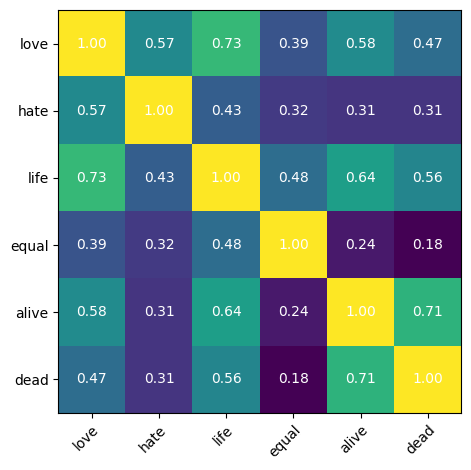

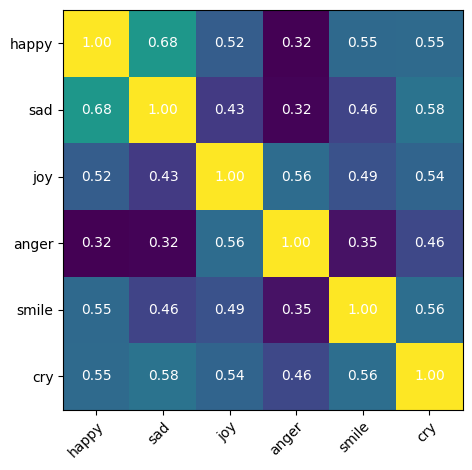

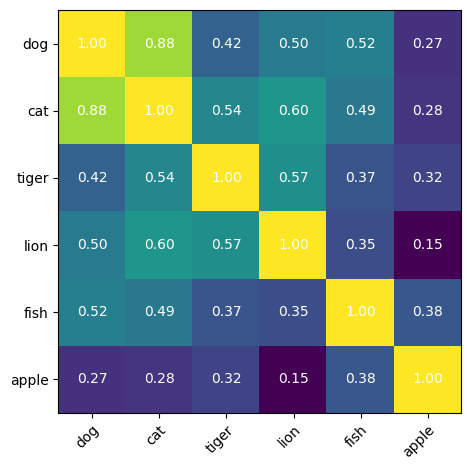

In [74]:
list_of_words1 = ['love', 'hate', 'life', 'equal', 'alive', 'dead']
list_of_words2 = ['happy', 'sad', 'joy', 'anger', 'smile', 'cry']
list_of_words3 = ['dog', 'cat', 'tiger', 'lion', 'fish', 'apple']

similarity_matrix1 = np.zeros((len(list_of_words1), len(list_of_words1)), dtype=float)
similarity_matrix2 = np.zeros((len(list_of_words2), len(list_of_words2)), dtype=float)
similarity_matrix3 = np.zeros((len(list_of_words3), len(list_of_words3)), dtype=float)

### YOUR CODE HERE
def fill_matrix(similarity_matrix,list_of_words):
    for i in range(len(list_of_words)):
        for j in range(len(list_of_words)):
            try:
                similarity_matrix[i, j] = glove_model.similarity(list_of_words[i], list_of_words[j])
            except KeyError:
                similarity_matrix[i, j] = 0.0

fill_matrix(similarity_matrix1, list_of_words1)
fill_matrix(similarity_matrix2, list_of_words2)
fill_matrix(similarity_matrix3, list_of_words3)
### YOUR CODE ENDS HERE


plot_similarity_matrix(similarity_matrix1, list_of_words1)
plot_similarity_matrix(similarity_matrix2, list_of_words2)
plot_similarity_matrix(similarity_matrix3, list_of_words3)

In [ ]:
#### YOUR CODE HERE
#Do they make sense? 
#the similarity matrices absolutely make sense, and they reveal a lot about the semantic structure captured by the word embeddings. They capture the semantic relationships between words.
#Why some words are closer to each other than others?
#Two words are closer if they: Frequently Appear in Similar Contexts, Belong to the Same Semantic Category, Are Antonyms but Co-occur Often. They belong to the same semantic or emotional category (joy, happy, smile...), even antonyms such as love and hate can be considered close if they appear in similar environments.
#What does it mean?
#It means they are semantically related even if not identical.
### YOUR CODE ENDS HERE

<a name='e11'></a>
### Exercise 11: Other pre-trained word embeddings
(10p) For this exercise, experiment with at least one different word embedding model. You can choose Glove with different dimensions or other pre-trained models. Use the gensim library to download and use the models.
Plot similarity matrices between sets of words you used in the previous exercise and compare the results. Are there noticeable differences? Why (not)?

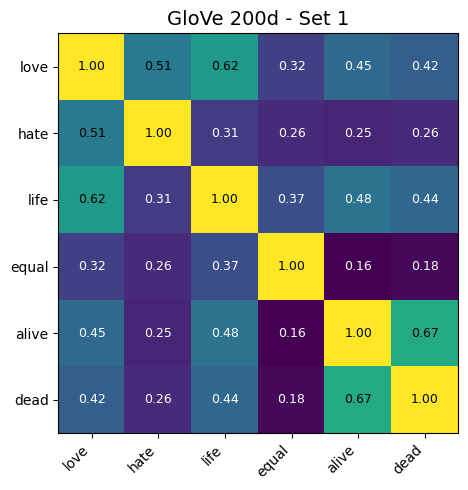

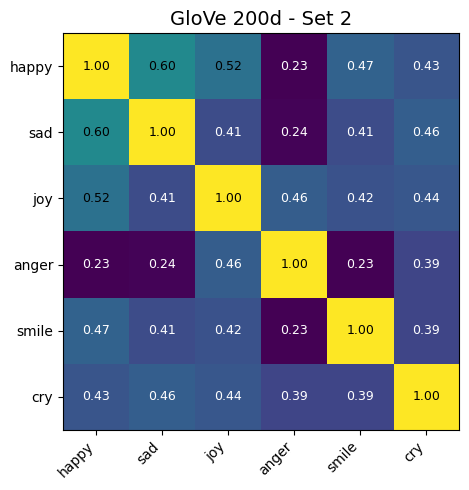

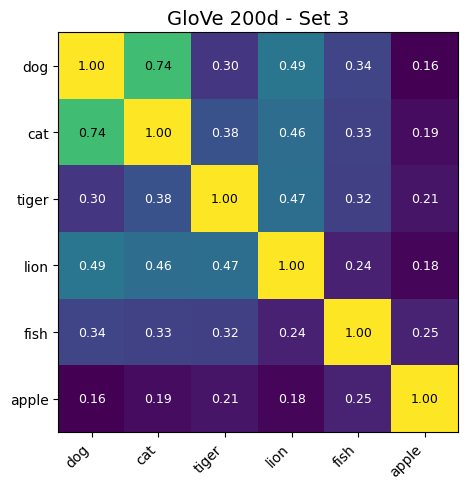

In [84]:
#### YOUR CODE HERE
import gensim.downloader as api

glove_200 = api.load("glove-wiki-gigaword-200")

def plot_similarity_matrix(similarity_matrix, words, title="Word Similarity Matrix"):
    plt.figure(figsize=(6, 5))
    plt.imshow(similarity_matrix, interpolation='nearest', cmap='viridis')
    plt.title(title, fontsize=14)
    plt.xticks(np.arange(len(words)), words, rotation=45, ha='right', fontsize=10)
    plt.yticks(np.arange(len(words)), words, fontsize=10)

    for i in range(len(words)):
        for j in range(len(words)):
            value = similarity_matrix[i, j]
            plt.text(j, i, f"{value:.2f}", ha='center', va='center',
                     color='white' if value < 0.5 else 'black', fontsize=9)

    plt.tight_layout()
    plt.show()

def fill_matrix(similarity_matrix, list_of_words, model):
    for i in range(len(list_of_words)):
        for j in range(len(list_of_words)):
            try:
                similarity_matrix[i, j] = model.similarity(list_of_words[i], list_of_words[j])
            except KeyError:
                similarity_matrix[i, j] = 0.0

sim_matrix1_200 = np.zeros((len(list_of_words1), len(list_of_words1)))
sim_matrix2_200 = np.zeros((len(list_of_words2), len(list_of_words2)))
sim_matrix3_200 = np.zeros((len(list_of_words3), len(list_of_words3)))

fill_matrix(sim_matrix1_200, list_of_words1, glove_200)
fill_matrix(sim_matrix2_200, list_of_words2, glove_200)
fill_matrix(sim_matrix3_200, list_of_words3, glove_200)

plot_similarity_matrix(sim_matrix1_200, list_of_words1, title="GloVe 200d - Set 1")
plot_similarity_matrix(sim_matrix2_200, list_of_words2, title="GloVe 200d - Set 2")
plot_similarity_matrix(sim_matrix3_200, list_of_words3, title="GloVe 200d - Set 3")
### YOUR CODE ENDS HERE

// your comments

In [ ]:
#we can see that the 100-dimension ended up with lower similarity scores which could mean that it had better semantic differentiation than the 100 dimension.
#it can also be seen that words sppearing in similar context are still identified as similar.
#Increasing dimensionality increases detail and gives the model more space to represent subtle differences between words which can lead to more precise representations but because the space is larger, words could potentially end up being far apart which could also reduce similarity scores even if they're still related.
#finally we can say that increasing dimensionality can improve precision but could also spread out the space reducing raw similarity values slightly.

## 5. Sentence Embeddings by Averaging Word Embeddings

Word embeddings are a powerful model for representing words and their meaning (in terms of distributional similarity). As we discussed in class, we can use them in a wide variety of tasks with more complex architectures. Word vectors offer a dense vector for each word. What if we wanted to represent a sentence (or a document) based on word vectors. How can we do that?

In the course, we will see different architectures that take into account the sequence of words (by combining their vectors). A first naive but simple and sometimes (as we are going to see) quite effective approach would be to represent a sentence with an embedding vector that is the average of the word vectors that form the sentence.

So formally, this is what we are aiming for:

$
\text{Sentence_Embedding} = \frac{1}{N} \sum_{i=1}^{N} \text{Word_Embedding}_i
$

where:
* $N$ is the number of words in a sentence
* $\text{Word_Embedding}_i$ is the word vector for the $i$-th in the sentence.

Things to note:
* The embedding vector for the sentence will obviously have the same dimension as the word embedding.
* This representation ignores the word order (like bag-of-words). During the course we will see how we can overcome this limitation by using sequence models.

<a name='e12'></a>
### Exercise 12: Sentence Embedding

(10p) Complete the function below that takes as input the sentence in the form of tokens (so it's a list of words) and calculates the sentence embedding vector. First, we would need to retrieve the word embeddings for each word from our loaded model and then average the vectors.

Note: There can be cases where all tokens from a sentence are out-of-vocabulary words (OOV). Think what to do in this case and make sure to discuss it in the report.

In [ ]:
def embed_sentence_word_model(tokens, model):
    """
    Calculates the sentence embedding by averaging the embeddings of the tokens
    Args:
        tokens: a list of words from the sentence
        model: a trained word embeddings model

    Returns: a numpy array of the sentence embedding

    """
    #### YOUR CODE HERE
    #### CAUTION: be sure to cover the case where all tokens are out-of-vocabulary!!!




    ### YOUR CODE ENDS HERE

Now we can apply the function to the whole dataset. Here we do it both for the sentence and the compressed version. You should know it by now, but this operation might take some time. The next cells will apply your function to the whole dataset.

In [ ]:
def embed_sentence_word_model_dataset(example, model):
    """
    Embeds the sentence and the compressed sentence in the example from the Dataset
    Args:
        example: an example from the Dataset
        model: a trained word embeddings model

    Returns: updated example with 'sentence_embedding' and 'compressed_embedding' columns

    """
    sentence_tokens = example['sentence_tokens']
    clean_compressed = example['clean_compressed']
    compressed_tokens = tokenize(clean_compressed)

    sentence_embedding = embed_sentence_word_model(sentence_tokens, model)
    compressed_embedding = embed_sentence_word_model(compressed_tokens, model)

    example['sentence_embedding'] = sentence_embedding
    example['compressed_embedding'] = compressed_embedding
    return example

In [ ]:
test_ds = test_ds.map(embed_sentence_word_model_dataset, fn_kwargs={'model': glove_model})
print(test_ds)

In [ ]:
for i in range(10):
    print(test_ds[i])

Here you can see that the new dataset returned a single numpy array containing all sentence embeddings in our dataset. This is a lot more efficient than returning a list of arrays (which is the default behaviour). Below we check the type and the dimensionality.

We will be using `text` subset from our dataset to not use too much RAM.

In [ ]:
sent_embedding = test_ds['sentence_embedding']
compr_embedding = test_ds['compressed_embedding']
print(type(sent_embedding))
print(sent_embedding.shape)
print(type(compr_embedding))
print(compr_embedding.shape)

Next we try the condensed representatin based on a simple query. Feel free to try different queries with different words. What happens if we have OOV words in a query?

In [ ]:
query = 'fox and deer'
print(query)

query_embedding = embed_text(query, clean, tokenize, lambda x: embed_sentence_word_model(x, glove_model))
print(query_embedding.shape)
print(query_embedding)

<a name='e13'></a>
### Exercise 13: Analyze sentence embeddings
- (5p) Calculate similarity between the word embeddings representations of the selected queries and the dataset sentences.
- (5p) Analyze the search results. Does the search work as expected? Discuss the results.
- (5p) Compare the results with the ones you got with the bag-of-words and TF-IDF representation. Discuss the differences and similarities.

In [ ]:
### YOUR CODE HERE




### YOUR CODE ENDS HERE

## 6. Evaluating Retrieval

In this last section we will try to evaluate how good our sentence retrieval system is. To keep the computational resources manageable, we will use the test set for that as its size is more manageable.

Recall from the lecture in IR that there are several metrics to evaluate retrieval performance by taking into account the relevance of the retrieved results to the query. We will use Recall@K here (for more metrics and more details refer to the lecture slides and the textbooks).

RRecall@K is a metric used to measure the effectiveness of a search system in retrieving relevant documents within the top $K$ retrieved documents. It calculates the proportion of relevant documents retrieved within the top-$K$ results, compared to the total number of relevant documents in the collection.

$
\text{Recall@K} = \frac{\text{Number of relevant documents retrieved in the top }-K}{\text{Total number of relevant documents}}
$

In our case, we have a sentence, and it's compressed version. To test our system, we will treat compressed sentences as the queries. Each query will have only a single relevant sentence - the corresponding uncompressed sentence.

Therefore, for the calculation of Recall@K we will take into account whether the correct retrieved result is contained within the first $K$ retrieved results. For example, if for a query (i.e. a compressed sentence) we retrieve 10 results and within these we see the relevant one (i.e. the full sentence), then Recall@10 = 1.

<a name='e14'></a>
### Exercise 14: Cosine similarity between two sets of vectors

(3p) In this exercise you will revisit your implementation of the cosine similarity. Generalize it so that it can accept two arrays containing two sets of vectors (first one containing $M$ vectors and the second one $N$ vectors). Compute the cosine similarity between each pair of vectors coming from the two sets. The result should be an array of size $M x N$.

Once again, try to write an efficient code. This means no loops. Remember the relation between matrix multiplication and dot product. (Depending on your implementation of the previous function calculating cosine similarity, this one can be almost the same)

In [ ]:
def cosine_similarity_m_to_n(vectors, other_vectors):
    """
    Calculates the cosine similarity between a multiple vectors and other vectors.
    Args:
        vectors: a numpy array representing M number of vectors of D dimensions (of the size MxD)
        other_vectors: a 2D numpy array representing other vectors (of the size NxD, where N is the number of vectors and D is their dimension)

    Returns: a numpy array of cosine similarity between all the vectors and all the other vectors

    """

    #### YOUR CODE HERE




    ### YOUR CODE ENDS HERE

The following function will use your implementation to calculate Recall@K based on the similarity matrix.

In [ ]:
def calculate_recall(queries, sentences, k, batch_size=1000):
    """
    Calculates recall@k given the embeddings of the queries and sentences.
    Assumes that only a single sentence with the same index as query is relevant.
    Batching is implemented to avoid high memory usage.
    Args:
        queries: a numpy array with the embeddings of N queries
        sentences: a numpy array with the embeddings of N sentences available for retrieval
        k: number of top results to search for the relevant sentence
        batch_size: number of queries to process at a time

    Returns: calculated recall@k

    """
    n_queries = queries.shape[0]
    correct = np.zeros(n_queries, dtype=bool)

    with tqdm.tqdm(total=n_queries) as pbar:
        for batch_start in range(0, n_queries, batch_size):
            batch_end = min(batch_start + batch_size, n_queries)
            queries_batch = queries[batch_start:batch_end]
            batch_similarity = cosine_similarity_m_to_n(queries_batch, sentences)

            for i, similarity_row in enumerate(batch_similarity):
                query_index = batch_start + i
                top_k = top_k_indices(similarity_row, k=k, sorted=False)

                if query_index in top_k:
                    correct[query_index] = True

                pbar.update(1)

    recall = np.sum(correct) / n_queries
    return recall

You can use it like so:

In [ ]:
recall_at_1 = calculate_recall(compr_embedding, sent_embedding, k=1, batch_size=1000)
print(f'\n{recall_at_1 * 100:.2f}%')

<a name='e15'></a>
### Exercise 15: Evaluating retrieval methods

(10p) Calculate recall for different values of $K$ for all methods:
- BOW,
- TF-IDF,
- Pre-trained embeddings.

Discuss the results.
Comment on how recall changes based on the value of $K$. Are the results expected or surprising?

In [ ]:
#### YOUR CODE HERE



### YOUR CODE ENDS HERE

<a name='e16'></a>
### Exercise 16: Improving retrieval

(10p) Imagine that you work at a company and are tasked with delivering the best retrieval method. Select the most promising one and try to improve the scores (e.g. by changing the vocab size, loading different model, etc.).
Discuss the results you achieve, even if you didn't manage to improve the scores.

In [ ]:
#### YOUR CODE HERE



### YOUR CODE ENDS HERE

// your comments